Problem Definition
---
I think one of the important things when you start a new machine learning project is Defining your problem. that means you should understand business problem.( Problem Formalization)

> We will be predicting whether a question asked on Quora is sincere or not

Source : https://www.kaggle.com/mjbahmani/a-data-science-framework-for-quora

Data Source : https://www.kaggle.com/c/quora-insincere-questions-classification/data

**About Quora**

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

**Business View**

An existential problem for any major website today is how to handle toxic and divisive content. Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

**What is a insincere question?**

Is defined as a question intended to make a statement rather than look for helpful answers.

![Quora_moderation_warning](\datasets\images/Quora_moderation_warning.png)

**Feature Set**

We use train.csv and test.csv as Input and we should upload a submission.csv as Output.

The training set contains the following 3 features (for Supervised Learning)
1. qid - unique question identifier
2. question_text - Quora question text
3. target - a question labeled "insincere" has a value of 1, otherwise 0

**Coding a solutiuon for solving the above problem**

In [114]:
# all import statements
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from wordcloud import WordCloud as wc   # not needed
from nltk.corpus import stopwords
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import string
import scipy
import numpy
import nltk
import json
import sys
import csv
import os

In [115]:
# printing versions of the important packages
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.1.2
sklearn: 0.22.1
scipy: 1.4.1
seaborn: 0.9.0
pandas: 0.25.3
numpy: 1.18.0
Python: 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 17:00:18) [MSC v.1900 64 bit (AMD64)]


We would first do EDA ( Exploratory Data Analysis ) over Quora Data set :
--

![Quora_EDA_steps](images/Quora_EDA_steps.png)

In [116]:
# I start Collection Data by reading training and testing datasets 
# into Pandas DataFrames.

train_large = pd.read_csv('C:\Program Files\Python36\suven\Adv ML\datasets\datasets/QuoratrainSet.csv')
test_large = pd.read_csv('C:\Program Files\Python36\suven\Adv ML\datasets\datasets/Quoratestdata.csv')

train = train_large[:15000]
test = test_large[:3000]

In [117]:
# check top 5 records of training dataset
train.head() 

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [118]:
# check top 5 records of testing dataset
test.head() 

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [119]:
# Find the type of features in Quora dataset
# i.e get a quick statistics


print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
qid              15000 non-null object
question_text    15000 non-null object
target           15000 non-null int64
dtypes: int64(1), object(2)
memory usage: 351.7+ KB
None


In [120]:
print(test.info())  # see carefully the last value is -> None. 
                    # indicating that there are no "Null" values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
qid              3000 non-null object
question_text    3000 non-null object
dtypes: object(2)
memory usage: 47.0+ KB
None


In [121]:
# shape for train and test
print('Shape of train:',train.shape)
print('Shape of test:',test.shape)

Shape of train: (15000, 3)
Shape of test: (3000, 2)


**Data Cleaning**

When dealing with real-world data, dirty data is the norm rather than the exception. 

The primary goal of data cleaning is to detect and remove errors and anomalies to increase the value of data in analytics and decision making. While it has been the focus of many researchers for several years, individual problems have been addressed separately. These include missing value imputation, outliers detection, transformations, integrity constraints violations detection and repair, consistent query answering, deduplication, and many other related problems such as profiling and constraints mining.

In [122]:
# How many NA elements in every column!!
# Good news, it is Zero!
# To check out how many null info are on the dataset, we can use isnull().sum().
# recall from info() -> we found that it has zero Nulls. 

train.isnull().sum()

# data is infact clean and ready for use.

qid              0
question_text    0
target           0
dtype: int64

In [123]:
# in case , their were NA or None values in any row then we would drop the row.

# remove rows that have NA's
print('Before Droping',train.shape)
train = train.dropna()
print('After Droping',train.shape)

Before Droping (15000, 3)
After Droping (15000, 3)


In [124]:
# Number of words in the text

train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["question_text"].apply(lambda x: len(str(x).split()))
print(train.head())
print(test.head())
print('maximum of num_words in train',train["num_words"].max())
print('min of num_words in train',train["num_words"].min())
print("maximum of  num_words in test",test["num_words"].max())
print('min of num_words in train',test["num_words"].min())

                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  num_words  
0       0         13  
1       0         16  
2       0         10  
3       0          9  
4       0         15  
                    qid                                      question_text  \
0  0000163e3ea7c7a74cd7  Why do so many women become so rude and arroga...   
1  00002bd4fb5d505b9161  When should I apply for RV college of engineer...   
2  00007756b4a147d2b0b3  What is it really like to be a nurse practitio...   
3  000086e4b7e1c7146103                             Who are entrepreneurs?   
4  

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
# Number of unique words in the text
train["num_unique_words"] = train["question_text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["question_text"].apply(lambda x: len(set(str(x).split())))

print('maximum of num_unique_words in train',train["num_unique_words"].max())

print("maximum of num_unique_words in test",test["num_unique_words"].max())


maximum of num_unique_words in train 48
maximum of num_unique_words in test 41


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
# Number of stopwords in the text

#from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

train["num_stopwords"] = train["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test["num_stopwords"] = test["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

print('maximum of num_stopwords in train',train["num_stopwords"].max())
print("maximum of num_stopwords in test",test["num_stopwords"].max())


maximum of num_stopwords in train 30
maximum of num_stopwords in test 32


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [127]:
# Number of punctuations in the text

train["num_punctuations"] =train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
# print(train.head())
# print(test.head())
print('maximum of num_punctuations in train',train["num_punctuations"].max())
print("maximum of num_punctuations in test",test["num_punctuations"].max())

maximum of num_punctuations in train 39
maximum of num_punctuations in test 21


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [128]:
# lets figure out how many unique target values exist.
# like we expect : 0 -> sincere qns and 1 -> un-sincere qns

# You see number of unique item for Target with command below:
train_target = train['target'].values

np.unique(train_target)

array([0, 1], dtype=int64)

**YES, quora problem is a binary classification!**

**The data is absolutely clean. But is it balanced ?**

I mean do we have equal no. of sincere and un-sincere questions in the dataset.

lets find out :

In [129]:
train.where(train ['target']==1).count()

qid                 944
question_text       944
target              944
num_words           944
num_unique_words    944
num_stopwords       944
num_punctuations    944
dtype: int64

**This means out of 1500 records 86 are unsincere**

Thats about 86/1500 = 5.7%

In [130]:
print("% of un-sincere qns is ", 86/1500)

% of un-sincere qns is  0.05733333333333333


This means we have approx. 94% of the sincere Qns.

**Such a dataset is imbalanced.**

>Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

> Imbalance means that the number of data points available for different classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

![imbalacedQuoraData](images/imbalacedQuoraData.png)

A typical example of imbalanced data is encountered in e-mail classification problem where emails are classified into ham or spam. The number of spam emails is usually lower than the number of relevant (ham) emails. So, using the original distribution of two classes leads to imbalanced dataset.

Using accuracy as a performace measure for highly imbalanced datasets is not a good idea. For example, if 90% points belong to the true class in a binary classification problem, a default prediction of true for all data points leads to a classifier which is 90% accurate, even though the classifier has not learnt anything about the classification problem at hand!

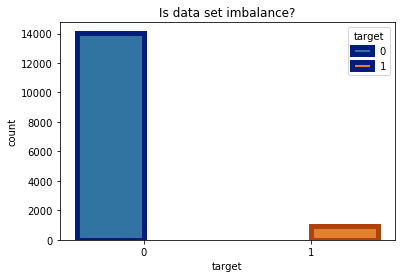

In [131]:
# visualising the imbalance in data set

ax=sns.countplot(x='target',hue="target", data=train  ,linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.title('Is data set imbalance?');

Data Preprocessing
----

This basically involves transforming raw data into an understandable format for NLP models.

Remember, our feature "Question_Text" is Text or String Object and No ML algo say KNN or Bayes classification would accept Text. Hence Pre-Processing is mandatory in this case.  

Below, I have recalled the two most important techniques that are also performed besides other easy to understand steps in data pre-processing:

1. Tokenization: This is a process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens. The list of tokens becomes input for further processing. NLTK Library has word_tokenize and sent_tokenize to easily break a stream of text into a list of words or sentences, respectively.


2. Word Stemming/Lemmatization: The aim of both processes is the same, reducing the inflectional forms of each word into a common base or root. Lemmatization is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

![Quora_data_preprocessing](images/Quora_data_preprocessing.png)

**We would atleast the following (Text) Pre-Processing steps**

1. Change all the text to lower case

2. Word Tokenization

3. Remove Stop words

4. Remove Non-alpha text

5. Word Lemmatization

6. Converting the text data into Numeric vectors( called Vectorization )

In [132]:
# step 1: Change all the text to lower case. 

# This is required as python interprets 'quora' and 'QUORA' differently

train['question_text'] = [entry.lower() for entry in train['question_text']]

test['question_text'] = [entry.lower() for entry in test['question_text']]

test.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,qid,question_text,num_words,num_unique_words,num_stopwords,num_punctuations
0,0000163e3ea7c7a74cd7,why do so many women become so rude and arroga...,21,19,11,1
1,00002bd4fb5d505b9161,when should i apply for rv college of engineer...,30,23,17,2
2,00007756b4a147d2b0b3,what is it really like to be a nurse practitio...,10,10,6,1
3,000086e4b7e1c7146103,who are entrepreneurs?,3,3,2,1
4,0000c4c3fbe8785a3090,is education really making good people nowadays?,7,7,1,1


In [133]:
# more imports for NLP
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [134]:
# step 2 : Tokenization : In this each entry in the corpus will be broken 
#                         into set of words


train['question_text']= [word_tokenize(entry) for entry in train['question_text']]

test['question_text']= [word_tokenize(entry) for entry in test['question_text']]

test.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,qid,question_text,num_words,num_unique_words,num_stopwords,num_punctuations
0,0000163e3ea7c7a74cd7,"[why, do, so, many, women, become, so, rude, a...",21,19,11,1
1,00002bd4fb5d505b9161,"[when, should, i, apply, for, rv, college, of,...",30,23,17,2
2,00007756b4a147d2b0b3,"[what, is, it, really, like, to, be, a, nurse,...",10,10,6,1
3,000086e4b7e1c7146103,"[who, are, entrepreneurs, ?]",3,3,2,1
4,0000c4c3fbe8785a3090,"[is, education, really, making, good, people, ...",7,7,1,1


In [135]:
# Set random seed
# This is used to reproduce the same result every time 
# if the script is kept consistent otherwise each run 
# will produce different results. The seed can be set to any number.
np.random.seed(500)

In [136]:
# step 3, 4 and 5
# Remove Stop words and Numeric data 
# and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb
# or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
# the tag_map would map any tag to 'N' (Noun) except
# Adjective to J, Verb -> v, Adverb -> R
# that means if you get a Pronoun then it would still be mapped to Noun


for index,entry in enumerate(train['question_text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' 
    # i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only 
        # alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
            
    # The final processed set of words for each iteration will be stored 
    # in 'question_text_final'
    train.loc[index,'question_text_final'] = str(Final_words)  
    
print(train.head())

                    qid                                      question_text  \
0  00002165364db923c7e6  [how, did, quebec, nationalists, see, their, p...   
1  000032939017120e6e44  [do, you, have, an, adopted, dog, ,, how, woul...   
2  0000412ca6e4628ce2cf  [why, does, velocity, affect, time, ?, does, v...   
3  000042bf85aa498cd78e  [how, did, otto, von, guericke, used, the, mag...   
4  0000455dfa3e01eae3af  [can, i, convert, montra, helicon, d, to, a, m...   

   target  num_words  num_unique_words  num_stopwords  num_punctuations  \
0       0         13                13              7                 1   
1       0         16                15              9                 2   
2       0         10                 8              3                 2   
3       0          9                 9              3                 1   
4       0         15                15              8                 1   

                                 question_text_final  
0  ['quebec', 'nationalis

In [137]:
# step 3, 4 and 5
# Remove Stop words and Numeric data 
# and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb
# or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
# the tag_map would map any tag to 'N' (Noun) except
# Adjective to J, Verb -> v, Adverb -> R
# that means if you get a Pronoun then it would still be mapped to Noun


for index,entry in enumerate(test['question_text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words_test = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' 
    # i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only 
        # alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words_test.append(word_Final)
            
    # The final processed set of words for each iteration will be stored 
    # in 'question_text_final'
    test.loc[index,'question_text_final'] = str(Final_words_test)    

print(test.head())

c:\program files\python36\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\program files\python36\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


                    qid                                      question_text  \
0  0000163e3ea7c7a74cd7  [why, do, so, many, women, become, so, rude, a...   
1  00002bd4fb5d505b9161  [when, should, i, apply, for, rv, college, of,...   
2  00007756b4a147d2b0b3  [what, is, it, really, like, to, be, a, nurse,...   
3  000086e4b7e1c7146103                       [who, are, entrepreneurs, ?]   
4  0000c4c3fbe8785a3090  [is, education, really, making, good, people, ...   

   num_words  num_unique_words  num_stopwords  num_punctuations  \
0         21                19             11                 1   
1         30                23             17                 2   
2         10                10              6                 1   
3          3                 3              2                 1   
4          7                 7              1                 1   

                                 question_text_final  
0  ['many', 'woman', 'become', 'rude', 'arrogant'...  
1  ['apply', 'rv',

In [138]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(train['question_text_final'])

Train_X_Tfidf = Tfidf_vect.transform(train['question_text_final'])

Test_X_Tfidf = Tfidf_vect.transform(test['question_text_final'])

In [139]:
# You can use the below syntax to see the vocabulary that 
# it has learned from the corpus
print(Tfidf_vect.vocabulary_)

{'quebec': 10855, 'nationalist': 9021, 'see': 11939, 'province': 10708, 'nation': 9018, 'adopt': 198, 'dog': 3935, 'would': 14862, 'encourage': 4393, 'people': 10005, 'shop': 12147, 'velocity': 14321, 'affect': 249, 'time': 13539, 'space': 12542, 'geometry': 5477, 'otto': 9631, 'von': 14500, 'guericke': 5761, 'use': 14194, 'magdeburg': 8035, 'hemisphere': 6011, 'convert': 2977, 'montra': 8760, 'helicon': 6000, 'mountain': 8826, 'bike': 1452, 'change': 2275, 'tyre': 13911, 'gaza': 5422, 'slowly': 12382, 'become': 1299, 'auschwitz': 998, 'dachau': 3317, 'treblinka': 13766, 'palestinian': 9772, 'quora': 10874, 'automatically': 1026, 'ban': 1162, 'conservative': 2889, 'opinion': 9530, 'report': 11310, 'liberal': 7709, 'view': 14394, 'crazy': 3143, 'wash': 14587, 'wipe': 14783, 'grocery': 5738, 'germ': 5488, 'everywhere': 4639, 'thing': 13464, 'dress': 4027, 'moderately': 8688, 'different': 3729, 'modestly': 8694, 'ever': 4629, 'phase': 10103, 'wherein': 14702, 'ignorant': 6405, 'love': 792

In [140]:
print(Train_X_Tfidf)

# Output: 
# 1: Row number of ‘Train_X_Tfidf’, 0 is the sentence number
# 2: Unique Integer number of each word, 2982 is where the word is in the corpus
# 3: Score calculated by TF-IDF Vectorizer

  (0, 11939)	0.30069751448370113
  (0, 10855)	0.4848705185236342
  (0, 10708)	0.4968836778542565
  (0, 9021)	0.534199959102793
  (0, 9018)	0.3771188134083847
  (1, 14862)	0.18744864502808342
  (1, 12147)	0.3383931780682121
  (1, 10005)	0.19449855559871665
  (1, 4393)	0.3799035394097826
  (1, 3935)	0.3014794820607904
  (1, 198)	0.7598070788195652
  (2, 14321)	0.6816644513132366
  (2, 13539)	0.20030929495367858
  (2, 12542)	0.2773844978302303
  (2, 5477)	0.37839876312335247
  (2, 249)	0.5244825817900651
  (3, 14500)	0.4297809332572122
  (3, 14194)	0.19803570932994952
  (3, 9631)	0.44809094845120234
  (3, 8035)	0.44809094845120234
  (3, 6011)	0.4167897707322595
  (3, 5761)	0.44809094845120234
  (4, 13911)	0.3970738498195995
  (4, 8826)	0.39013726524235975
  (4, 8760)	0.44651000583578443
  :	:
  (14995, 13376)	0.3571061914887556
  (14995, 10547)	0.5614028585252218
  (14995, 7601)	0.30713012393983075
  (14995, 6881)	0.5614028585252218
  (14995, 1643)	0.30873299285549494
  (14995, 1384)	0.22

In [141]:
print(Test_X_Tfidf)

  (0, 14817)	0.246423013630397
  (0, 14619)	0.40015255554868456
  (0, 11619)	0.38176567573815745
  (0, 10429)	0.2868424453874653
  (0, 8181)	0.22460278249406615
  (0, 7823)	0.33921737570028404
  (0, 5497)	0.17354084561856511
  (0, 1506)	0.3412331575750045
  (0, 1299)	0.22976716938140146
  (0, 825)	0.43158513419750283
  (1, 14539)	0.264860351980696
  (1, 13045)	0.27485958772416885
  (1, 11389)	0.49704798960652974
  (1, 4429)	0.4081235424725203
  (1, 2707)	0.2967087287651224
  (1, 2666)	0.3969771825747993
  (1, 713)	0.44164773052978473
  (2, 11051)	0.4994411873004137
  (2, 9355)	0.7825191291141893
  (2, 7752)	0.37178261524488176
  (3, 4474)	1.0
  (4, 11051)	0.40283577553718425
  (4, 10005)	0.29484496439614455
  (4, 9316)	0.582583977298527
  (4, 8085)	0.30956499115747393
  :	:
  (2996, 8085)	0.18309714418289233
  (2996, 7594)	0.3202153218227155
  (2996, 7198)	0.3489456740828173
  (2996, 3388)	0.41128838375225674
  (2996, 2043)	0.3538276792320532
  (2996, 1246)	0.3733089239236176
  (2997, 

Data Pre-processing is over !!
---

Use ML Algorithms to Predict the outcome
---

In [142]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
train_Y = train["target"]

Naive.fit(Train_X_Tfidf,train_Y)

# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

print(predictions_NB)

[0 0 0 ... 0 0 0]


In [144]:
from collections import Counter
Counter(predictions_NB)

Counter({0: 3000})

In [145]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

SVM.fit(Train_X_Tfidf,train['target'])

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

print(predictions_SVM)
Counter(predictions_SVM)

[0 0 0 ... 0 0 0]


Counter({0: 2946, 1: 54})